# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'
    
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | whistler
Processing Record 4 of Set 1 | dauphin
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | santa rosa
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | cadale
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | trashi yangtse
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | murashi
Processing Record 22 of Set 1 | arraial do cabo
Pr

Processing Record 41 of Set 4 | dampit
Processing Record 42 of Set 4 | tingi
Processing Record 43 of Set 4 | pierre
Processing Record 44 of Set 4 | harstad
Processing Record 45 of Set 4 | nadi
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | guatrache
Processing Record 48 of Set 4 | kuybyshevo
Processing Record 49 of Set 4 | taro
Processing Record 0 of Set 5 | ixtapa
Processing Record 1 of Set 5 | tamanrasset
Processing Record 2 of Set 5 | alotau
City not found. Skipping...
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | mount hagen
Processing Record 7 of Set 5 | estes park
Processing Record 8 of Set 5 | lompoc
Processing Record 9 of Set 5 | zhalantun
Processing Record 10 of Set 5 | choibalsan
Processing Record 11 of Set 5 | dwarka
Processing Record 12 of Set 5 | hazorasp
Processing Record 13 of Set 5 | yemva
Processing Record 14 of Set 5 | nirmal
Processing Record

Processing Record 34 of Set 8 | kencong
Processing Record 35 of Set 8 | broome
Processing Record 36 of Set 8 | aasiaat
Processing Record 37 of Set 8 | barra de santo antonio
Processing Record 38 of Set 8 | mokopane
Processing Record 39 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 40 of Set 8 | kavieng
Processing Record 41 of Set 8 | fort st. john
Processing Record 42 of Set 8 | nanchang
Processing Record 43 of Set 8 | wanning
Processing Record 44 of Set 8 | trinity beach
Processing Record 45 of Set 8 | port augusta
Processing Record 46 of Set 8 | shangri-la
City not found. Skipping...
Processing Record 47 of Set 8 | krasnoural'sk
Processing Record 48 of Set 8 | nikolayevsk-on-amure
Processing Record 49 of Set 8 | labrador city
Processing Record 0 of Set 9 | sao gabriel da cachoeira
Processing Record 1 of Set 9 | celestun
Processing Record 2 of Set 9 | bemidji
Processing Record 3 of Set 9 | amalapuram
Processing Record 4 of Set 9 | sandnessjoen
Processing Record 5 of

Processing Record 20 of Set 12 | hell-ville
Processing Record 21 of Set 12 | posto fiscal rolim de moura
Processing Record 22 of Set 12 | namie
Processing Record 23 of Set 12 | booue
Processing Record 24 of Set 12 | karnobat
Processing Record 25 of Set 12 | guerrero negro
Processing Record 26 of Set 12 | bikenibeu village
Processing Record 27 of Set 12 | grants
Processing Record 28 of Set 12 | xintai
Processing Record 29 of Set 12 | nowe
Processing Record 30 of Set 12 | vaasa
Processing Record 31 of Set 12 | rabo de peixe
Processing Record 32 of Set 12 | tongouson
Processing Record 33 of Set 12 | changyon
Processing Record 34 of Set 12 | yanbu
Processing Record 35 of Set 12 | kendari
Processing Record 36 of Set 12 | meldola
Processing Record 37 of Set 12 | langarud
Processing Record 38 of Set 12 | ikryanoye
Processing Record 39 of Set 12 | mu'minobod
Processing Record 40 of Set 12 | sillamae
Processing Record 41 of Set 12 | lisakovsk
Processing Record 42 of Set 12 | nogliki
Processing 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,8.90,98,100,2.57,US,1698638283
1,vorgashor,67.5833,63.9500,-19.07,99,38,2.04,RU,1698638480
2,whistler,50.1164,-122.9695,1.42,78,74,0.96,CA,1698638481
3,dauphin,51.1494,-100.0502,-3.92,86,100,3.09,CA,1698638481
4,georgetown,5.4112,100.3354,29.99,74,20,4.12,MY,1698638480


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,8.90,98,100,2.57,US,1698638283
1,vorgashor,67.5833,63.9500,-19.07,99,38,2.04,RU,1698638480
2,whistler,50.1164,-122.9695,1.42,78,74,0.96,CA,1698638481
3,dauphin,51.1494,-100.0502,-3.92,86,100,3.09,CA,1698638481
4,georgetown,5.4112,100.3354,29.99,74,20,4.12,MY,1698638480


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

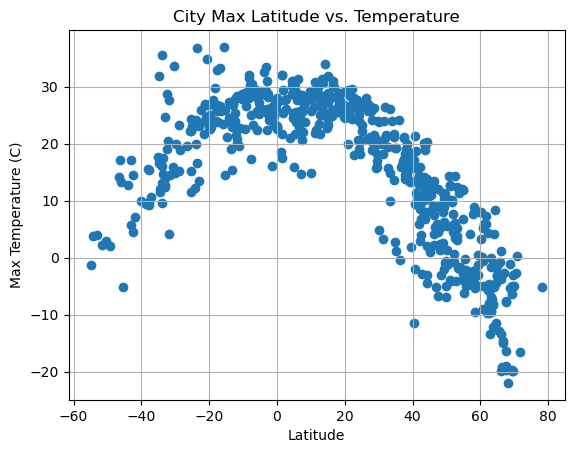

In [97]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')

plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.grid()

# Save the figure
plt.savefig("Latitue vs Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

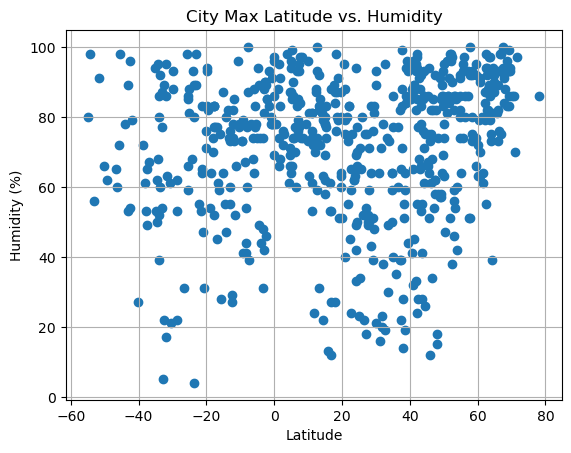

In [98]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity')

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.grid()

# Save the figure
plt.savefig("Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

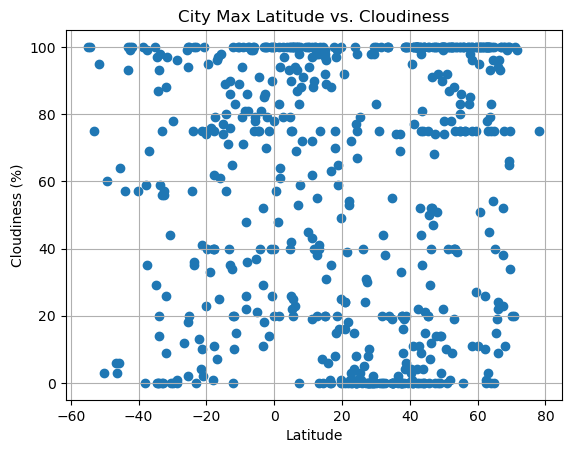

In [99]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness')

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

plt.grid()

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

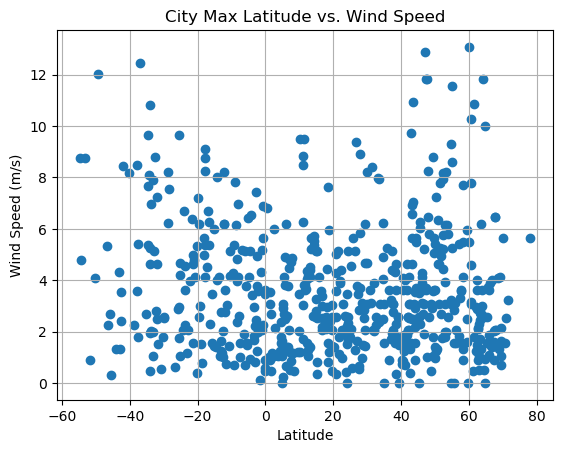

In [100]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (m/s)')

plt.grid()

# Save the figure
plt.savefig("Latitude vs Windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()




In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,8.90,98,100,2.57,US,1698638283
1,vorgashor,67.5833,63.9500,-19.07,99,38,2.04,RU,1698638480
2,whistler,50.1164,-122.9695,1.42,78,74,0.96,CA,1698638481
3,dauphin,51.1494,-100.0502,-3.92,86,100,3.09,CA,1698638481
4,georgetown,5.4112,100.3354,29.99,74,20,4.12,MY,1698638480


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,adamstown,-25.0660,-130.1015,22.68,81,100,4.22,PN,1698638482
9,avarua,-21.2078,-159.7750,24.03,64,75,4.63,CK,1698638463
10,west island,-12.1568,96.8225,27.99,74,100,8.23,CC,1698638485
13,port-aux-francais,-49.3500,70.2167,1.98,62,60,12.02,TF,1698638486
14,edinburgh of the seven seas,-37.0676,-12.3116,10.61,67,69,12.44,SH,1698638486


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7847426498647269


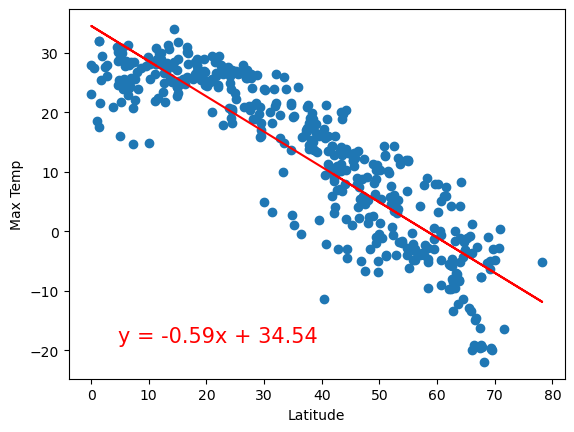

In [89]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.5138994746705249


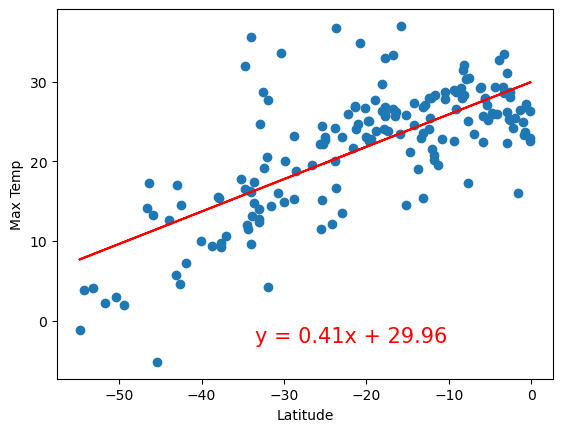

In [90]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship: For Northern Hemisphere we see a negative correlation between maximum temperatures and the temperature drops as the latitude increases.The R2 value(0.78) shows the fit is decent. For southern hemisphere there is a positive corelation between latitude and maximum termperature but the R2 value(0.51) shows that the fit is not very good. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0264283568063517


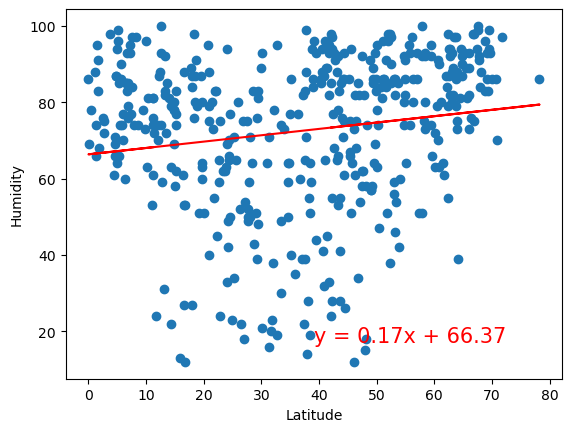

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.008372206807611658


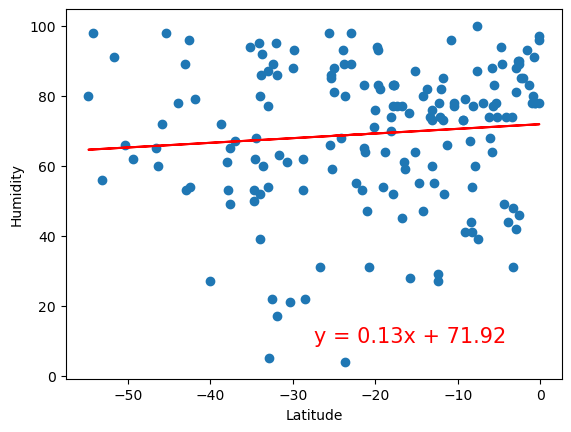

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:For humidity we can see that there is no correlation between latitude and humidity as the data is very spread out as evidenced by the very low R2 values for both plots. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008563338300585204


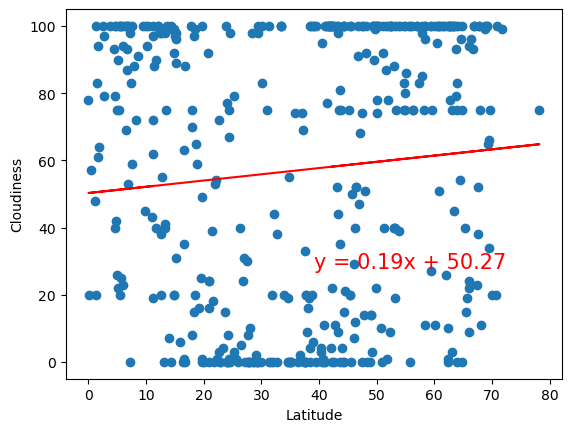

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.019468378256441866


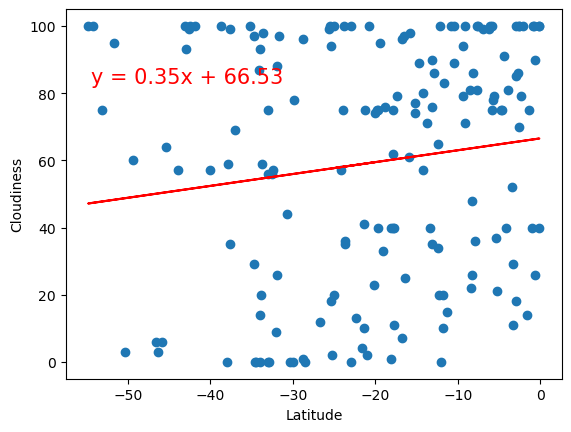

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011587530786814019


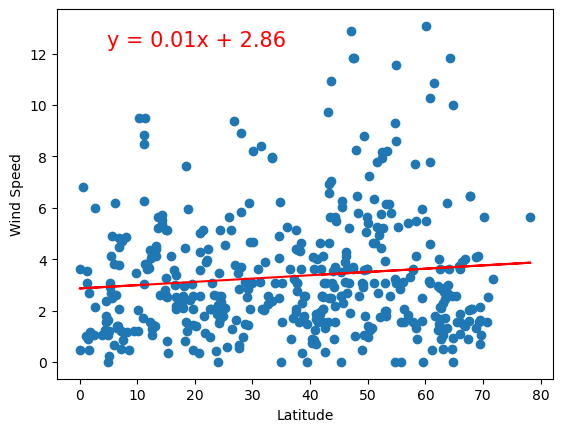

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.049034867855458034


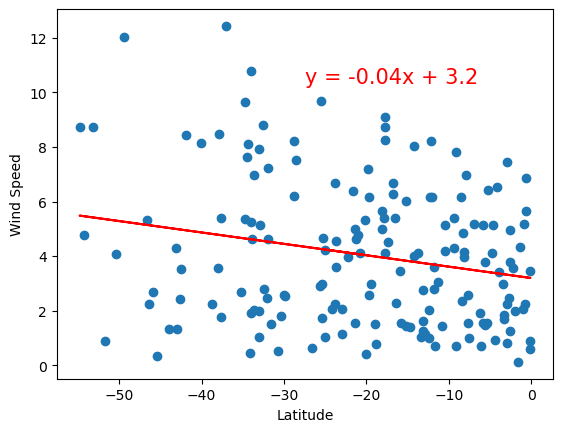

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)


**Discussion about the linear relationship:There is no correlation between latitude and windspeed for both hemispheres, however the spread of data for nothern hemisphere is better than southern hemisphere as the northern hemisphere has a higher R2 value.